# Nishi Anand - H2HBABBA2585 - House Mike

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(9,6)})

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# load dataset
df = pd.read_csv('H2HBABBA2585.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200729290,KROGER co,06-02-20 0:00,2020,1930423074,22-01-20,20200121,20200122,20200206,USD,RV,1,NaN,59499.90,20200122,NAA8,1.930423e+09,0
1,U001,200763814,SYSCO F systems,15-10-19 0:00,2019,1929928930,26-09-19,20190926,20190926,20191011,USD,RV,1,NaN,3403.42,20190926,NAA8,1.929929e+09,0
2,U001,200769623,WAL-MAR systems,14-05-19 0:00,2019,1929211846,26-04-19,20190426,20190426,20190511,USD,RV,1,NaN,28257.54,20190426,NAH4,1.929212e+09,0
3,CA02,140104240,FEDER systems,28-03-19 0:00,2019,2960535793,18-03-19,20190318,20190318,20190404,CAD,RV,1,NaN,263121.52,20190325,CA10,2.960536e+09,0
4,U001,200793568,SUPE,26-11-19 0:00,2019,1930134840,11-11-19,20191109,20191111,20191126,USD,RV,1,NaN,128853.65,20191111,NAA8,1.930135e+09,0



# 1. Slice out the records with Clearing date Null into a separate DataFrame.


In [3]:
main_train= df[df['clear_date'].notnull()]
main_test = df[df['clear_date'].isnull()]

# 2. Preprocessing techniques on the remaining data.

### Remove null values

In [4]:
# Finding columns which have null values.
print([col for col in main_train.columns if main_train[col].isnull().sum()])

['area_business', 'invoice_id']


#### area_business

In [5]:
main_train['area_business'].isnull().sum()

40000

In [6]:
main_train.drop(['area_business'], axis=1, inplace=True)
main_train.shape

(40000, 18)

#### invoice_id

In [7]:
main_train[main_train['invoice_id'].isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
15659,CA02,140106054,TREE llc,06-05-19 0:00,2019,9500000104,29-03-19,20190329,20190208,20190218,CAD,X2,1,938.43,20190208,CA10,NaN,0
26688,CA02,100030194,AMAZO co,27-12-19 0:00,2019,9500000002,29-03-19,20190329,20190305,20190315,CAD,X2,1,773.80,20190305,CA10,NaN,0
39742,CA02,140104409,LOB trust,31-05-19 0:00,2019,9500000057,29-03-19,20190329,20190307,20190317,CAD,X2,1,17264.88,20190307,CA10,NaN,0


In [8]:
main_train.drop(['invoice_id'], axis=1, inplace=True)

### Remove columns with constant values

In [9]:
main_train.nunique().sort_values()

isOpen                        1
posting_id                    1
document type                 2
invoice_currency              2
buisness_year                 2
business_code                 6
cust_payment_terms           71
clear_date                  399
posting_date                423
document_create_date.1      423
document_create_date        427
baseline_create_date        431
due_in_date                 490
cust_number                1022
name_customer              3886
total_open_amount         35535
doc_id                    39105
dtype: int64

#### Drop 'posting_id', 'isOpen' since they have constant values

In [10]:
main_train.drop(['posting_id'], axis=1, inplace=True)
main_train.drop(['isOpen'], axis=1, inplace=True)
main_train.shape

(40000, 15)

### Remove duplicates

In [11]:
main_train = main_train.drop_duplicates(keep="first")
main_train.shape

(39105, 15)

### Change datatype

In [12]:
main_train.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year               int64
doc_id                      int64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
dtype: object

#### cust number to numeric

In [13]:
main_train["cust_number"] = pd.to_numeric(main_train['cust_number'],errors='coerce')
main_train = main_train.dropna(subset=['cust_number'],axis=0)

#### Date time conversion

In [14]:
main_train['clear_date'] = pd.to_datetime(main_train['clear_date'])
main_train['due_in_date'] = pd.to_datetime(main_train['due_in_date'], format="%Y%m%d")
main_train['posting_date'] = pd.to_datetime(main_train['posting_date'])

main_train['document_create_date.1'] = pd.to_datetime(main_train['document_create_date.1'],format='%Y%m%d')
main_train['document_create_date'] = pd.to_datetime(main_train['document_create_date'],format='%Y%m%d')
main_train['baseline_create_date'] = pd.to_datetime(main_train['baseline_create_date'],format='%Y%m%d')

## Prepare target column

In [15]:
main_train['target'] = (main_train['clear_date'] - main_train['due_in_date']).dt.days
main_train = main_train.drop('clear_date', axis=1)
main_train.shape

(37812, 15)

# 3. Sort the data in ascending order based on the Posting Date Column. 

In [16]:
main_train = main_train.sort_values('posting_date')
main_train.reset_index(drop=True)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,target
0,U001,200769623.0,WAL-MAR systems,2019,1928543624,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,43717.95,2018-12-30,NAH4,260
1,U001,200769623.0,WAL-MAR associates,2019,1928541516,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,9336.92,2018-12-30,NAH4,230
2,U001,200762301.0,C&S WH us,2019,1928536356,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,4474.21,2018-12-30,NAC6,1
3,U001,200769623.0,WAL-MAR corp,2019,1928539486,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,521.27,2018-12-30,NAH4,230
4,U001,200726979.0,BJ'S in,2019,1928540055,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,59.80,2018-12-30,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37807,U001,200726979.0,BJ'S trust,2020,1930517135,2020-12-02,2020-02-12,2020-02-12,2020-02-27,USD,RV,612.86,2020-02-12,NAA8,0
37808,CA02,140104423.0,METRO foundation,2020,2960613827,2020-12-02,2020-02-12,2020-02-12,2020-02-26,CAD,RV,158336.08,2020-02-16,CA10,-1
37809,U001,200762301.0,C&S WH corp,2020,1930518011,2020-12-02,2020-02-12,2020-02-12,2020-02-27,USD,RV,137438.47,2020-02-12,NAC6,0
37810,U001,200762301.0,C&S WH us,2020,1930510506,2020-12-02,2020-02-10,2020-02-12,2020-02-27,USD,RV,2009.73,2020-02-12,NAC6,0


# 4. Perform the Train, Val split. 

In [17]:
X = main_train.drop(['target'], axis=1)
y = main_train['target']

In [18]:
# Train - test split

X_train, X_test_train, y_train, y_test_train = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 0, 
    shuffle=False)

X_train.shape, X_test_train.shape

((30249, 14), (7563, 14))

In [19]:
# Train - val split

X_val, X_test, y_val, y_test = train_test_split(
    X_train,
    y_train,
    test_size = 0.3,
    random_state = 0,
    shuffle=False)

In [20]:
X_train.shape, X_val.shape, X_test.shape

((30249, 14), (21174, 14), (9075, 14))

# 5. Exploratory data analysis (EDA)

### Univariate analysis

<AxesSubplot:xlabel='target', ylabel='Density'>

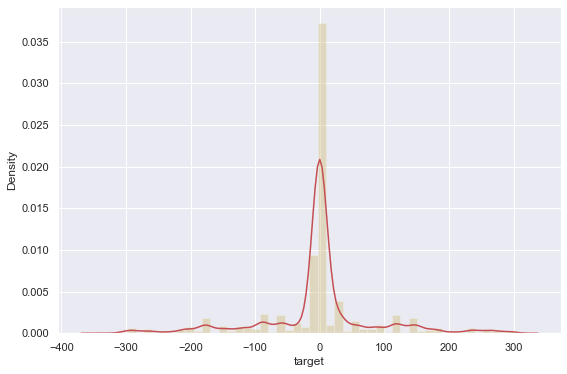

In [21]:
sns.distplot(y_train, color='r', hist_kws={"linewidth": 0.5, "color": "y"})

<AxesSubplot:xlabel='target'>

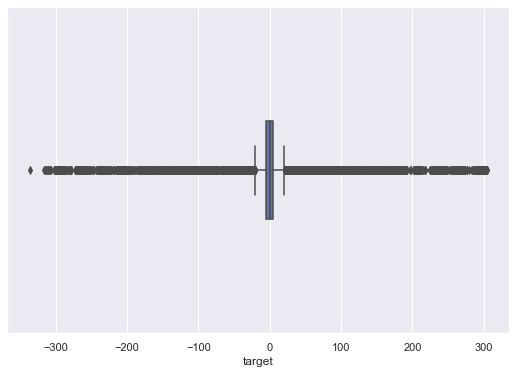

In [22]:
sns.boxplot(y_train, width=0.3)

### Multivariate analysis

#### 'posting_date' and delay

<AxesSubplot:xlabel='target', ylabel='posting_date'>

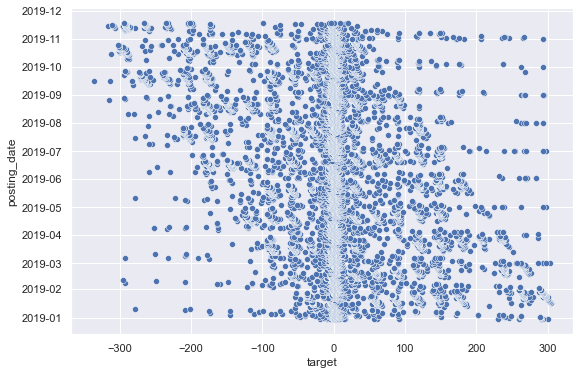

In [23]:
sns.scatterplot(y_train, X_train['posting_date'])

<AxesSubplot:xlabel='posting_date', ylabel='target'>

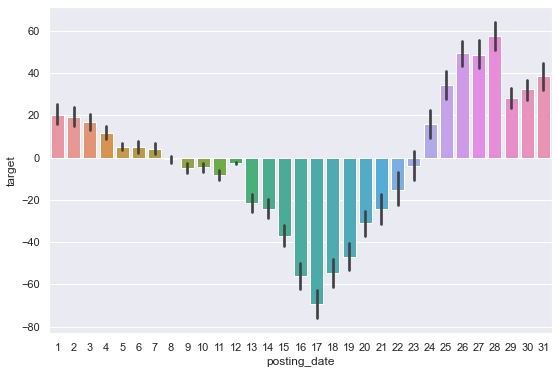

In [24]:
sns.barplot(X_train['posting_date'].dt.day, y_train)

# Postings made towards end and beginning of the month are usually delayed

<AxesSubplot:xlabel='posting_date', ylabel='target'>

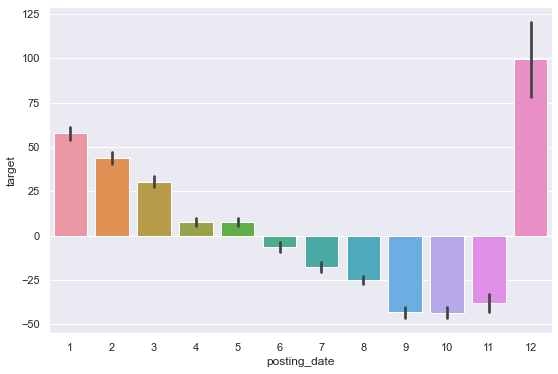

In [25]:
sns.barplot(X_train['posting_date'].dt.month, y_train)

# Postings from JULY to NOV are usually paid early

<AxesSubplot:xlabel='posting_date', ylabel='target'>

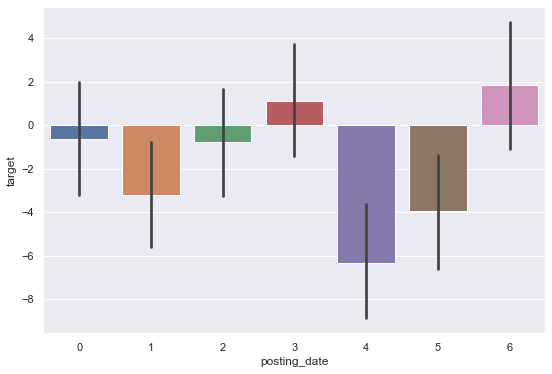

In [26]:
sns.barplot(X_train['posting_date'].dt.weekday, y_train)

# Postings on thursday and sunday are delayed

#### 'document_create_date.1' and delay

<AxesSubplot:xlabel='target', ylabel='document_create_date.1'>

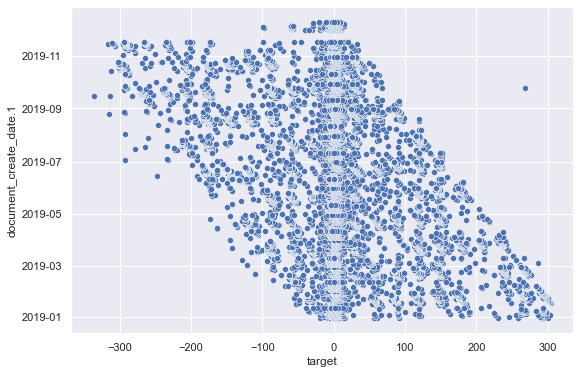

In [27]:
sns.scatterplot(y_train, X_train['document_create_date.1'])

<AxesSubplot:xlabel='document_create_date.1', ylabel='target'>

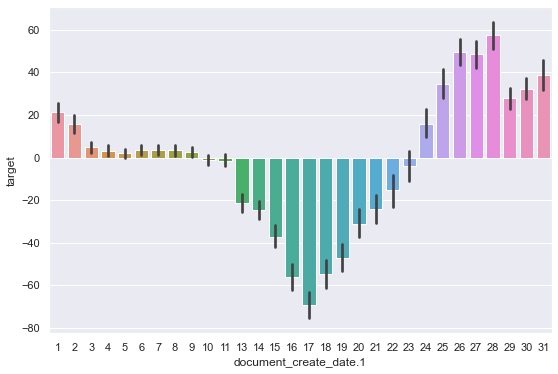

In [28]:
sns.barplot(X_train['document_create_date.1'].dt.day, y_train)
# invoice documents created towards end of month are usually delayed

<AxesSubplot:xlabel='document_create_date.1', ylabel='target'>

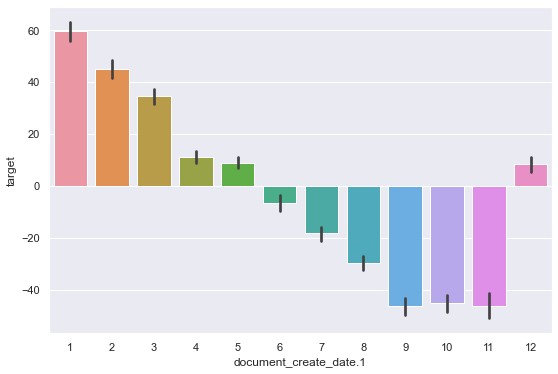

In [29]:
sns.barplot(X_train['document_create_date.1'].dt.month, y_train)
# invoice documents usually created from JUN TO NOV are usually paid early

<AxesSubplot:xlabel='document_create_date.1', ylabel='target'>

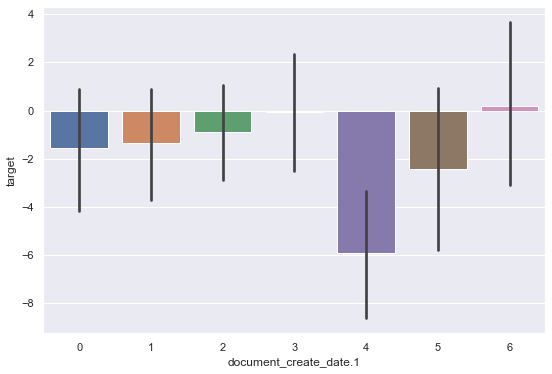

In [30]:
sns.barplot(X_train['document_create_date.1'].dt.weekday, y_train)

# invoice documents created on friday is usually paid early

#### 'baseline_create_date' and delay

<AxesSubplot:xlabel='target', ylabel='baseline_create_date'>

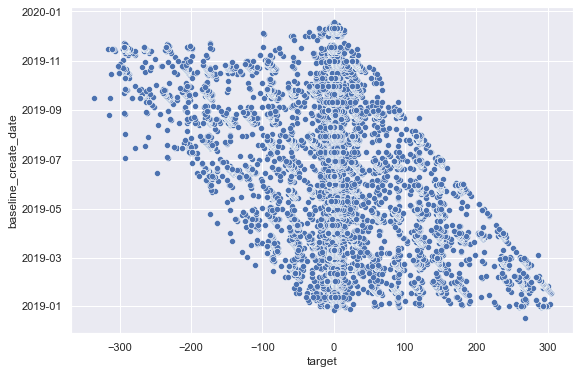

In [31]:
sns.scatterplot(y_train, X_train['baseline_create_date'])

<AxesSubplot:xlabel='baseline_create_date', ylabel='target'>

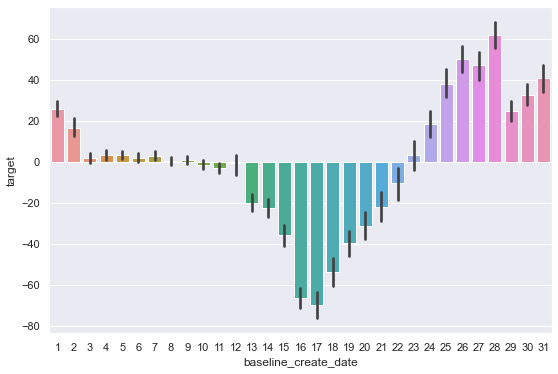

In [32]:
sns.barplot(X_train['baseline_create_date'].dt.day, y_train)
# invoice documents usually created at end of month are delayed

<AxesSubplot:xlabel='baseline_create_date', ylabel='target'>

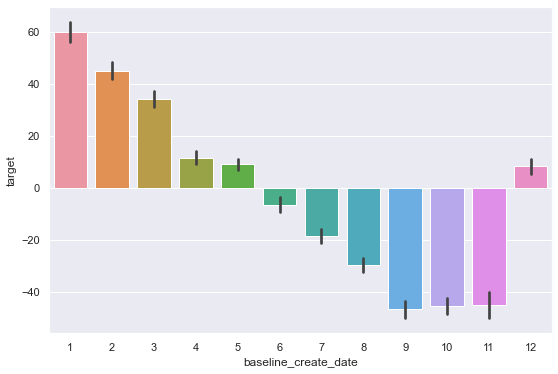

In [33]:
sns.barplot(X_train['baseline_create_date'].dt.month, y_train)
# invoice documents usually created from JUN TO NOV are usually paid early

<AxesSubplot:xlabel='baseline_create_date', ylabel='target'>

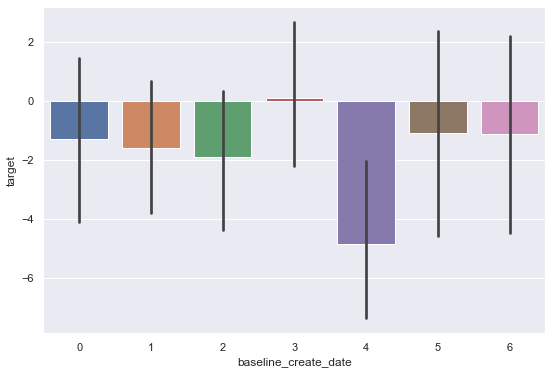

In [34]:
sns.barplot(X_train['baseline_create_date'].dt.weekday, y_train)

# invoices created on thursday is delayed

#### 'due_in_date' and delay

<AxesSubplot:xlabel='target', ylabel='due_in_date'>

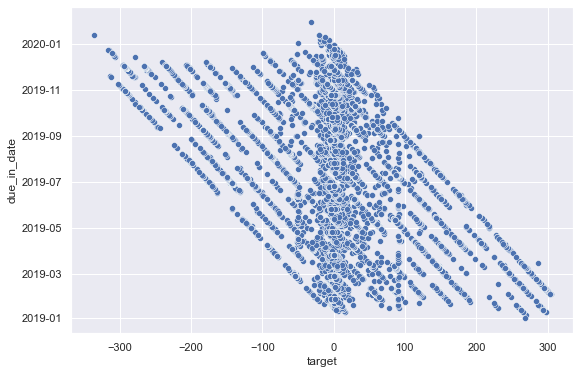

In [35]:
sns.scatterplot(y_train, X_train['due_in_date'])

<AxesSubplot:xlabel='due_in_date', ylabel='target'>

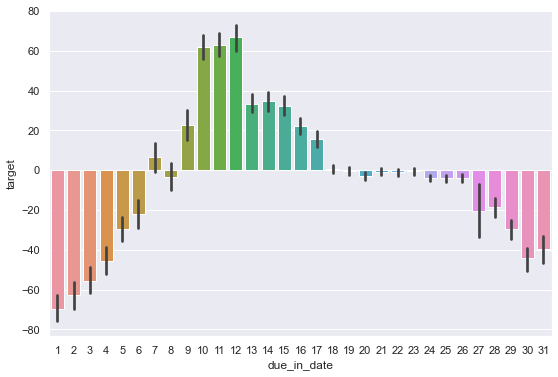

In [36]:
sns.barplot(X_train['due_in_date'].dt.day, y_train)

# 2nd week due dates are usually paid late

<AxesSubplot:xlabel='due_in_date', ylabel='target'>

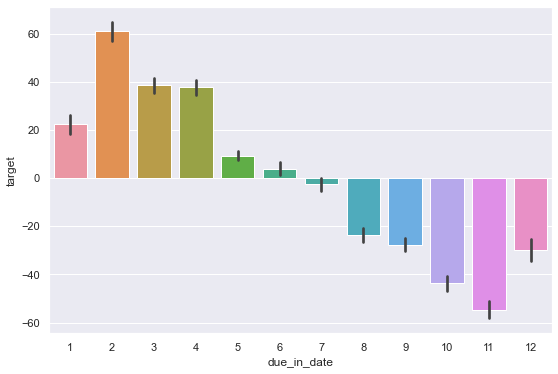

In [37]:
sns.barplot(X_train['due_in_date'].dt.month, y_train)

# Payments due from JAN to MAY are delayed

<AxesSubplot:xlabel='due_in_date', ylabel='target'>

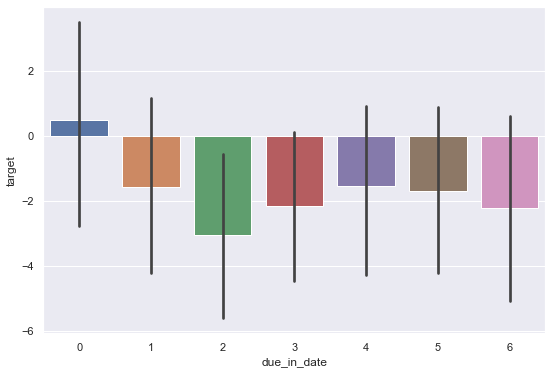

In [38]:
sns.barplot(X_train['due_in_date'].dt.weekday, y_train)

# monday due dates are usually delayed

<AxesSubplot:xlabel='due_in_date', ylabel='target'>

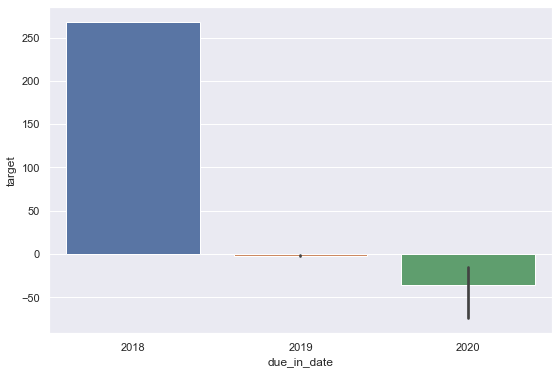

In [39]:
sns.barplot(X_train['due_in_date'].dt.year, y_train)

# delayed payments usually made in 2018

# 6. Feature engineering.

In [40]:
X_train.dtypes

business_code                     object
cust_number                      float64
name_customer                     object
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

### Function to drop columns from train, val and test

In [41]:
def dropCols(colName, traindf = X_train, valdf = X_val, testdf = X_test):
    traindf.drop([colName], axis=1, inplace=True)
    valdf.drop([colName], axis=1, inplace=True)
    testdf.drop([colName], axis=1, inplace=True)
    return traindf, valdf, testdf

### Function to split dates in train, val and test

In [42]:
def splitDates(colName, d):
    d[colName+'_day']= d[colName].dt.day
    d[colName+'_month']= d[colName].dt.month
    d[colName+'_year']= d[colName].dt.year
    d[colName+'_weekday']= d[colName].dt.weekday
    return d

#### posting_date

In [43]:
X_train = splitDates('posting_date', X_train)
X_val = splitDates('posting_date', X_val)
X_test = splitDates('posting_date', X_test)

X_train, X_val, X_test = dropCols('posting_date', X_train, X_val, X_test)

#### document_create_date

In [44]:
X_train = splitDates('document_create_date', X_train)
X_val = splitDates('document_create_date', X_val)
X_test = splitDates('document_create_date', X_test)

X_train, X_val, X_test = dropCols('document_create_date', X_train, X_val, X_test)

#### document_create_date.1

In [45]:
X_train = splitDates('document_create_date.1', X_train)
X_val = splitDates('document_create_date.1', X_val)
X_test = splitDates('document_create_date.1', X_test)

X_train, X_val, X_test = dropCols('document_create_date.1', X_train, X_val, X_test)

#### due_in_date

In [46]:
X_train = splitDates('due_in_date', X_train)
X_val = splitDates('due_in_date', X_val)
X_test = splitDates('due_in_date', X_test)

X_train, X_val, X_test = dropCols('due_in_date', X_train, X_val, X_test)

#### baseline_create_date

In [47]:
X_train = splitDates('baseline_create_date', X_train)
X_val = splitDates('baseline_create_date', X_val)
X_test = splitDates('baseline_create_date', X_test)

X_train, X_val, X_test = dropCols('baseline_create_date', X_train, X_val, X_test)

## Label encoder

In [48]:
label_encoder = LabelEncoder()

#### Business code

In [49]:
X_train['business_code']= label_encoder.fit_transform(X_train['business_code'])
X_val['business_code']= label_encoder.fit_transform(X_val['business_code'])
X_test['business_code']= label_encoder.fit_transform(X_test['business_code'])

#### name_customer

In [50]:
X_train['name_customer']= label_encoder.fit_transform(X_train['name_customer'])
X_val['name_customer']= label_encoder.fit_transform(X_val['name_customer'])
X_test['name_customer']= label_encoder.fit_transform(X_test['name_customer'])

#### cust_payment_terms

In [51]:
X_train['cust_payment_terms']= label_encoder.fit_transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms']= label_encoder.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms']= label_encoder.fit_transform(X_test['cust_payment_terms'])

#### document type

In [52]:
X_train['document type']= label_encoder.fit_transform(X_train['document type'])
X_val['document type']= label_encoder.fit_transform(X_val['document type'])
X_test['document type']= label_encoder.fit_transform(X_test['document type'])

#### buisness year

In [53]:
X_train['buisness_year']= label_encoder.fit_transform(X_train['buisness_year'])
X_val['buisness_year']= label_encoder.fit_transform(X_val['buisness_year'])
X_test['buisness_year']= label_encoder.fit_transform(X_test['buisness_year'])

#### invoice_currency

In [54]:
X_train['invoice_currency']= label_encoder.fit_transform(X_train['invoice_currency'])
X_val['invoice_currency']= label_encoder.fit_transform(X_val['invoice_currency'])
X_test['invoice_currency']= label_encoder.fit_transform(X_test['invoice_currency'])

# 7. Feature Selection.

<AxesSubplot:>

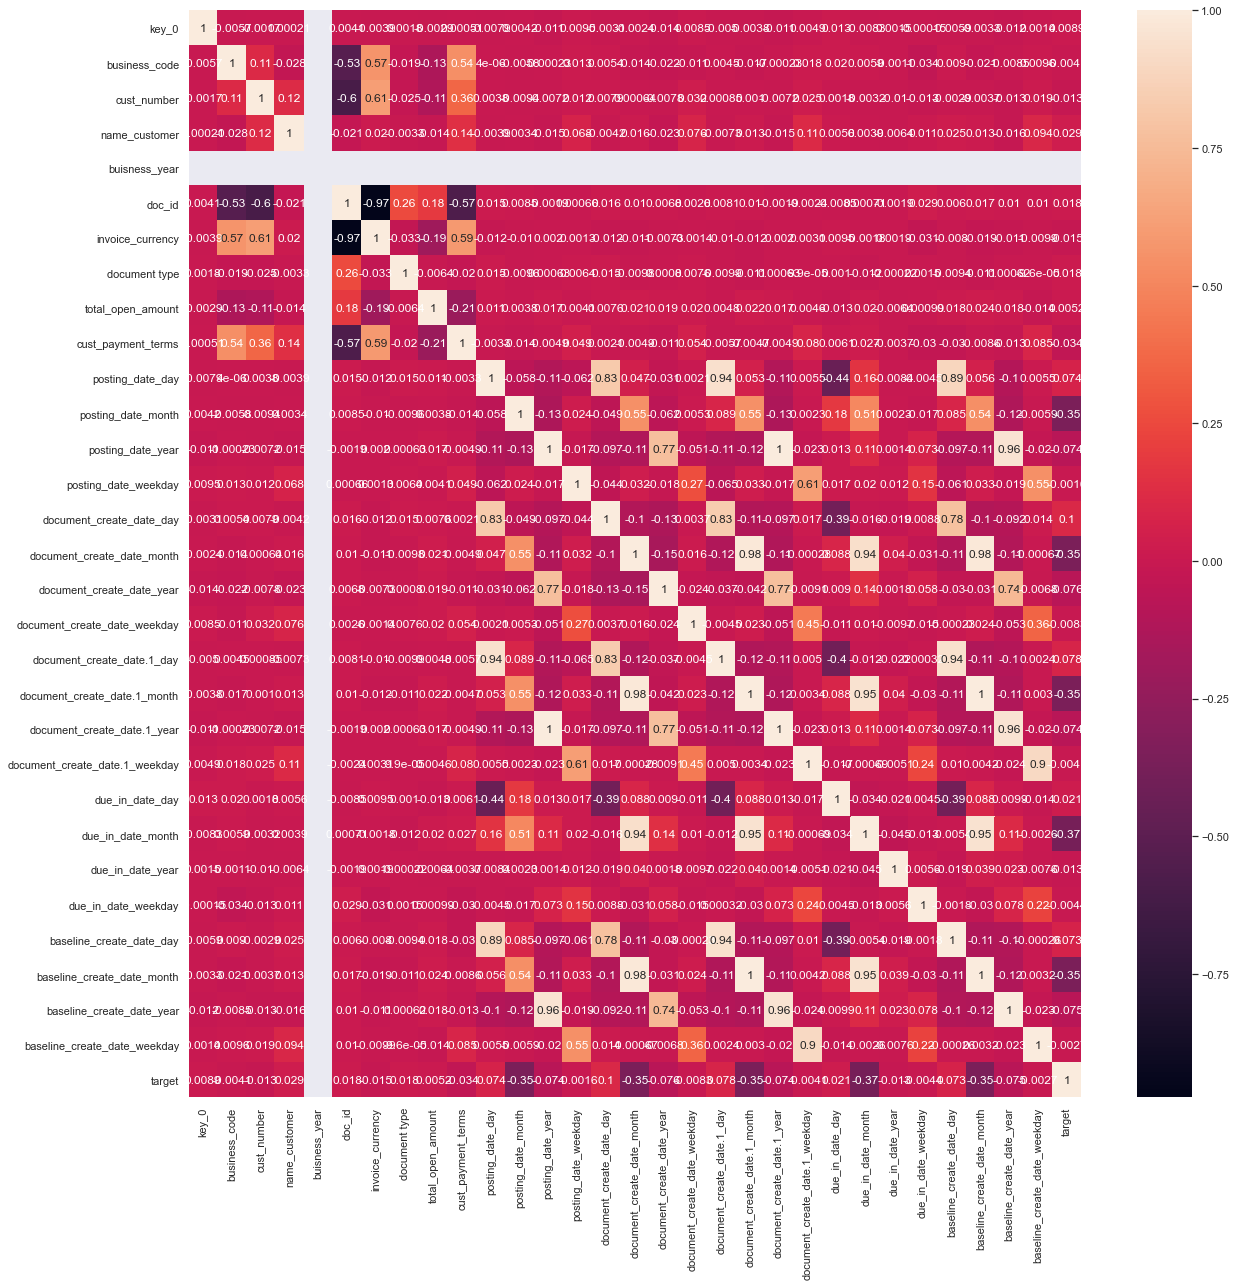

In [55]:
corrmat = X_train.merge(y_train, on = X_train.index).corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,annot=True)

In [56]:
def handling_correlation(df,threshold=0.8):
    corr_features = set()
    # Correlation matrix
    corr_matrix = df.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

for col in handling_correlation(X_train.copy(), 0.9):
    print(col)
    X_train, X_val, X_test = dropCols(col, X_train, X_val, X_test)

due_in_date_month
baseline_create_date_weekday
baseline_create_date_day
baseline_create_date_month
baseline_create_date_year
document_create_date.1_day
document_create_date.1_year
document_create_date.1_month
invoice_currency


In [57]:
X_train, X_val, X_test = dropCols('buisness_year', X_train, X_val, X_test)
X_train, X_val, X_test = dropCols('business_code', X_train, X_val, X_test)
X_train, X_val, X_test = dropCols('name_customer', X_train, X_val, X_test)
X_train, X_val, X_test = dropCols('document type', X_train, X_val, X_test)
X_train, X_val, X_test = dropCols('document_create_date_weekday', X_train, X_val, X_test)

(30249, 15)

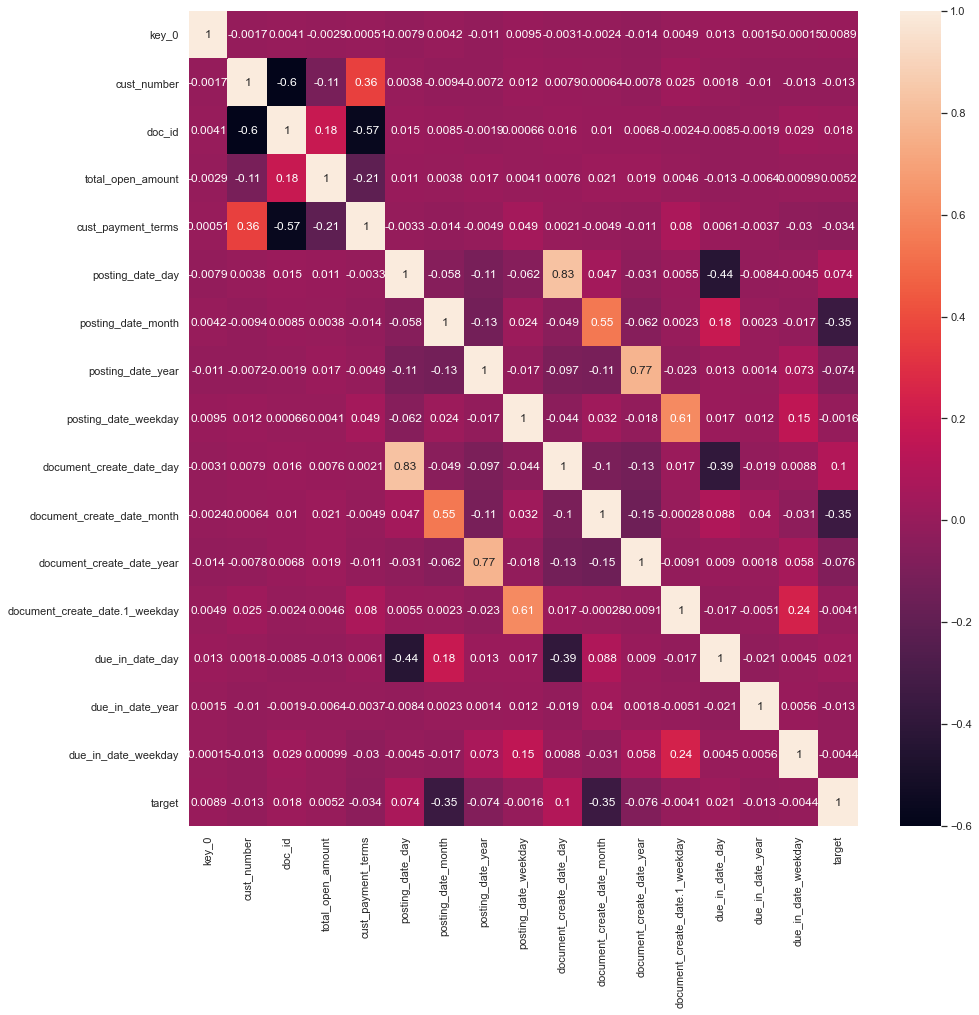

In [58]:
corrmat = X_train.merge(y_train, on = X_train.index).corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,annot=True)
X_train.shape

# 8. Map those Selected Features on your Val and Test set.

In [59]:
# Done above

# 9. Build a machine learning model using your Train data and use it to generate predictions for the Validation set. 

In [60]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
predicted_val = tree_model.predict(X_val)
pd.DataFrame(zip(y_val, predicted_val), columns = ['actual', 'predicted'])

,actual,predicted
0,260,260.0
1,230,230.0
2,1,1.0
3,230,230.0
4,1,1.0
...,...,...
21169,-15,-15.0
21170,-1,-1.0
21171,-3,-3.0
21172,0,0.0


# 10. Find the mse and rmse for the validation set.

In [62]:
mean_squared_error(y_val, predicted_val, squared=False)

5.837949704206342

In [63]:
r2_score(y_val, predicted_val)

0.9946350270966974

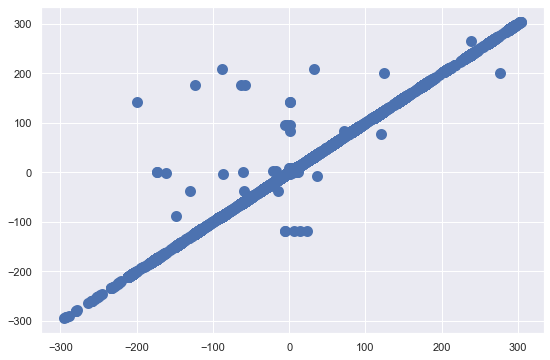

In [64]:
plt.scatter( y_val, predicted_val, label='line one', linewidth=5)

In [65]:
predicted_test = tree_model.predict(X_test)
pd.DataFrame(zip(y_val, predicted_test), columns = ['actual', 'predicted'])

,actual,predicted
0,260,-4.0
1,230,0.0
2,1,1.0
3,230,-3.0
4,1,1.0
...,...,...
9070,-4,-201.0
9071,0,-99.0
9072,-4,-294.0
9073,-1,-266.0


In [66]:
mean_squared_error(y_test, predicted_test, squared=False)

61.990820434817756

In [67]:
r2_score(y_test, predicted_test)

0.5353839551009878

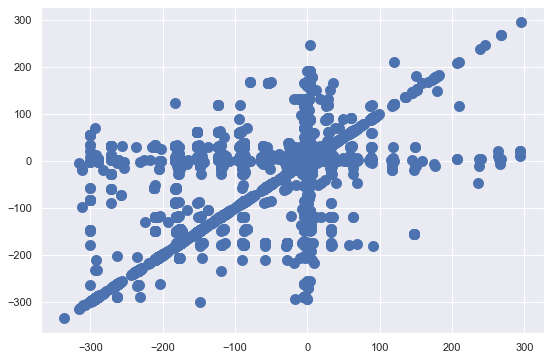

In [68]:
plt.scatter(y_test, predicted_test, label='line one', linewidth=5)

# 11. Now take the dataframe which has the records with clearing date = NULL.

In [69]:
main_test.reset_index(drop=True, inplace=True)

# 12. Map selected features finalized on your train set to this data frame with clearing date = NULL and then predict the delay for those records.

In [70]:
main_test.drop(['business_code'], axis=1, inplace=True)

In [71]:
# custnumber
main_test['cust_number'] = pd.to_numeric(main_test['cust_number'],errors='coerce') # invalid parsing will be set as NaN
main_test = main_test.dropna(subset=['cust_number'],axis=0)

In [72]:
# name_customer
main_test.drop(['name_customer'], axis=1, inplace=True)

In [73]:
#clear_date
main_test.drop(['clear_date'], axis=1, inplace=True)

In [74]:
#buisness_year
main_test.drop(['buisness_year'], axis=1, inplace=True)

In [75]:
# posting date day, mont, year, weekday
main_test['posting_date'] = pd.to_datetime(main_test['posting_date'])
main_test = splitDates('posting_date', main_test)
main_test.drop(['posting_date'], axis=1, inplace=True)

In [76]:
# document_create_date day month year weekday
main_test['document_create_date'] = pd.to_datetime(main_test['document_create_date'],format='%Y%m%d')
main_test = splitDates('document_create_date', main_test)
main_test.drop(['document_create_date', 'document_create_date_weekday'], axis=1, inplace=True)

In [77]:
# document_create_date.1 weekday
main_test['document_create_date.1'] = pd.to_datetime(main_test['document_create_date.1'],format='%Y%m%d')
main_test['document_create_date.1_weekday'] = main_test['document_create_date.1'].dt.weekday
main_test.drop(['document_create_date.1'], axis=1, inplace=True)

In [78]:
#due in date day year weekday
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date'], format="%Y%m%d")
main_test = splitDates('due_in_date', main_test)
due_in_date_month = main_test['due_in_date_month']
main_test.drop(columns=['due_in_date', 'due_in_date_month'], axis=1, inplace=True)

In [79]:
# invoice_currency
main_test.drop(['invoice_currency'], axis=1, inplace=True)

In [80]:
# document type
main_test.drop(['document type'], axis=1, inplace=True)

In [81]:
# posting_id
main_test.drop(['posting_id'], axis=1, inplace=True)

In [82]:
# area_business
main_test.drop(['area_business'], axis=1, inplace=True)

In [83]:
# baseline_create_date
main_test.drop(['baseline_create_date'], axis=1, inplace=True)

In [84]:
#cust_payment_terms
main_test['cust_payment_terms']= label_encoder.fit_transform(main_test['cust_payment_terms'])

In [85]:
# invoice_id
main_test.drop(['invoice_id'], axis=1, inplace=True)

In [86]:
# isOpen
main_test.drop(['isOpen'], axis=1, inplace=True)

In [87]:
main_test.shape

(9873, 15)

In [88]:
main_test

,cust_number,doc_id,total_open_amount,cust_payment_terms,posting_date_day,posting_date_month,posting_date_year,posting_date_weekday,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date.1_weekday,due_in_date_day,due_in_date_year,due_in_date_weekday
0,200126819.0,1930819994,17615.52,15,23,4,2020,3,23,4,2020,3,8,2020,4
1,200592182.0,1930665676,4299.26,33,18,3,2020,2,18,3,2020,2,8,2020,2
2,200769623.0,1930710285,1204.78,29,29,3,2020,6,28,3,2020,6,13,2020,0
3,200772670.0,1930711985,41390.80,34,27,3,2020,4,27,3,2020,4,11,2020,5
4,200780383.0,1930840860,18480.19,15,29,4,2020,2,30,4,2020,2,14,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,200777735.0,1930637264,57664.31,15,13,3,2020,4,11,3,2020,4,28,2020,5
9996,200769623.0,1930683618,4065.83,29,26,3,2020,3,21,3,2020,3,10,2020,4
9997,140104409.0,2960623935,105119.39,3,25,3,2020,2,25,3,2020,2,4,2020,5
9998,200769623.0,1930802979,13651.15,29,20,4,2020,0,20,4,2020,0,5,2020,1


In [89]:
main_test.dtypes

cust_number                       float64
doc_id                              int64
total_open_amount                 float64
cust_payment_terms                  int32
posting_date_day                    int64
posting_date_month                  int64
posting_date_year                   int64
posting_date_weekday                int64
document_create_date_day            int64
document_create_date_month          int64
document_create_date_year           int64
document_create_date.1_weekday      int64
due_in_date_day                     int64
due_in_date_year                    int64
due_in_date_weekday                 int64
dtype: object

### Predicting delay

In [90]:
predicted_main_test = tree_model.predict(main_test)

In [91]:
predicted_main_test

array([ -9., -94.,   0., ...,  28.,  61., 132.])

In [92]:
main_test['delay'] = predicted_main_test
main_test

,cust_number,doc_id,total_open_amount,cust_payment_terms,posting_date_day,posting_date_month,posting_date_year,posting_date_weekday,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date.1_weekday,due_in_date_day,due_in_date_year,due_in_date_weekday,delay
0,200126819.0,1930819994,17615.52,15,23,4,2020,3,23,4,2020,3,8,2020,4,-9.0
1,200592182.0,1930665676,4299.26,33,18,3,2020,2,18,3,2020,2,8,2020,2,-94.0
2,200769623.0,1930710285,1204.78,29,29,3,2020,6,28,3,2020,6,13,2020,0,0.0
3,200772670.0,1930711985,41390.80,34,27,3,2020,4,27,3,2020,4,11,2020,5,119.0
4,200780383.0,1930840860,18480.19,15,29,4,2020,2,30,4,2020,2,14,2020,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,200777735.0,1930637264,57664.31,15,13,3,2020,4,11,3,2020,4,28,2020,5,3.0
9996,200769623.0,1930683618,4065.83,29,26,3,2020,3,21,3,2020,3,10,2020,4,239.0
9997,140104409.0,2960623935,105119.39,3,25,3,2020,2,25,3,2020,2,4,2020,5,28.0
9998,200769623.0,1930802979,13651.15,29,20,4,2020,0,20,4,2020,0,5,2020,1,61.0


In [93]:
main_test['due_in_date_month'] = due_in_date_month

In [94]:
main_test['due_in_date'] = main_test['due_in_date_year'].astype(str) + '-' + main_test['due_in_date_month'].astype(str) + '-' + main_test['due_in_date_day'].astype(str)

In [95]:
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date'])
main_test

,cust_number,doc_id,total_open_amount,cust_payment_terms,posting_date_day,posting_date_month,posting_date_year,posting_date_weekday,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date.1_weekday,due_in_date_day,due_in_date_year,due_in_date_weekday,delay,due_in_date_month,due_in_date
0,200126819.0,1930819994,17615.52,15,23,4,2020,3,23,4,2020,3,8,2020,4,-9.0,5,2020-05-08
1,200592182.0,1930665676,4299.26,33,18,3,2020,2,18,3,2020,2,8,2020,2,-94.0,4,2020-04-08
2,200769623.0,1930710285,1204.78,29,29,3,2020,6,28,3,2020,6,13,2020,0,0.0,4,2020-04-13
3,200772670.0,1930711985,41390.80,34,27,3,2020,4,27,3,2020,4,11,2020,5,119.0,4,2020-04-11
4,200780383.0,1930840860,18480.19,15,29,4,2020,2,30,4,2020,2,14,2020,3,3.0,5,2020-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,200777735.0,1930637264,57664.31,15,13,3,2020,4,11,3,2020,4,28,2020,5,3.0,3,2020-03-28
9996,200769623.0,1930683618,4065.83,29,26,3,2020,3,21,3,2020,3,10,2020,4,239.0,4,2020-04-10
9997,140104409.0,2960623935,105119.39,3,25,3,2020,2,25,3,2020,2,4,2020,5,28.0,4,2020-04-04
9998,200769623.0,1930802979,13651.15,29,20,4,2020,0,20,4,2020,0,5,2020,1,61.0,5,2020-05-05


In [96]:
main_test.dtypes

cust_number                              float64
doc_id                                     int64
total_open_amount                        float64
cust_payment_terms                         int32
posting_date_day                           int64
posting_date_month                         int64
posting_date_year                          int64
posting_date_weekday                       int64
document_create_date_day                   int64
document_create_date_month                 int64
document_create_date_year                  int64
document_create_date.1_weekday             int64
due_in_date_day                            int64
due_in_date_year                           int64
due_in_date_weekday                        int64
delay                                    float64
due_in_date_month                          int64
due_in_date                       datetime64[ns]
dtype: object

In [97]:
main_test['predicted_payment_date'] = main_test['due_in_date'] + pd.to_timedelta(pd.np.ceil(main_test.delay), unit="D")
main_test

,cust_number,doc_id,total_open_amount,cust_payment_terms,posting_date_day,posting_date_month,posting_date_year,posting_date_weekday,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date.1_weekday,due_in_date_day,due_in_date_year,due_in_date_weekday,delay,due_in_date_month,due_in_date,predicted_payment_date
0,200126819.0,1930819994,17615.52,15,23,4,2020,3,23,4,2020,3,8,2020,4,-9.0,5,2020-05-08,2020-04-29
1,200592182.0,1930665676,4299.26,33,18,3,2020,2,18,3,2020,2,8,2020,2,-94.0,4,2020-04-08,2020-01-05
2,200769623.0,1930710285,1204.78,29,29,3,2020,6,28,3,2020,6,13,2020,0,0.0,4,2020-04-13,2020-04-13
3,200772670.0,1930711985,41390.80,34,27,3,2020,4,27,3,2020,4,11,2020,5,119.0,4,2020-04-11,2020-08-08
4,200780383.0,1930840860,18480.19,15,29,4,2020,2,30,4,2020,2,14,2020,3,3.0,5,2020-05-14,2020-05-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,200777735.0,1930637264,57664.31,15,13,3,2020,4,11,3,2020,4,28,2020,5,3.0,3,2020-03-28,2020-03-31
9996,200769623.0,1930683618,4065.83,29,26,3,2020,3,21,3,2020,3,10,2020,4,239.0,4,2020-04-10,2020-12-05
9997,140104409.0,2960623935,105119.39,3,25,3,2020,2,25,3,2020,2,4,2020,5,28.0,4,2020-04-04,2020-05-02
9998,200769623.0,1930802979,13651.15,29,20,4,2020,0,20,4,2020,0,5,2020,1,61.0,5,2020-05-05,2020-07-05


# 14. Bucketize the delay into the Ageing buckets as mentioned in your PRS (<0, 0-15, 16-30, 31-45, etc). And store the buckets in a column.

In [98]:
def buckets(x):
    if x<=0:
        return('(<0) Days')
    if x>0 and x<=15:
        return('(0-15) Days')
    elif x>15 and x<=30:
        return('(16-30) Days')
    elif x>30 and x<=45:
        return('(31-45) Days')
    elif x>45 and x<=60:
        return('(45-60) Days')
    else:
        return('(>60) Days')

In [99]:
bk = pd.Series([buckets(x=predicted_main_test[i]) for i in range(len(predicted_main_test))])

In [100]:
bk = bk.to_frame(name='bucket')
bk

,bucket
0,(<0) Days
1,(<0) Days
2,(<0) Days
3,(>60) Days
4,(0-15) Days
...,...
9868,(0-15) Days
9869,(>60) Days
9870,(16-30) Days
9871,(>60) Days


In [101]:
main_test.reset_index(drop=True, inplace=True) 
main_test = pd.concat([main_test, bk], axis=1)

In [102]:
main_test

,cust_number,doc_id,total_open_amount,cust_payment_terms,posting_date_day,posting_date_month,posting_date_year,posting_date_weekday,document_create_date_day,document_create_date_month,document_create_date_year,document_create_date.1_weekday,due_in_date_day,due_in_date_year,due_in_date_weekday,delay,due_in_date_month,due_in_date,predicted_payment_date,bucket
0,200126819.0,1930819994,17615.52,15,23,4,2020,3,23,4,2020,3,8,2020,4,-9.0,5,2020-05-08,2020-04-29,(<0) Days
1,200592182.0,1930665676,4299.26,33,18,3,2020,2,18,3,2020,2,8,2020,2,-94.0,4,2020-04-08,2020-01-05,(<0) Days
2,200769623.0,1930710285,1204.78,29,29,3,2020,6,28,3,2020,6,13,2020,0,0.0,4,2020-04-13,2020-04-13,(<0) Days
3,200772670.0,1930711985,41390.80,34,27,3,2020,4,27,3,2020,4,11,2020,5,119.0,4,2020-04-11,2020-08-08,(>60) Days
4,200780383.0,1930840860,18480.19,15,29,4,2020,2,30,4,2020,2,14,2020,3,3.0,5,2020-05-14,2020-05-17,(0-15) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,200777735.0,1930637264,57664.31,15,13,3,2020,4,11,3,2020,4,28,2020,5,3.0,3,2020-03-28,2020-03-31,(0-15) Days
9869,200769623.0,1930683618,4065.83,29,26,3,2020,3,21,3,2020,3,10,2020,4,239.0,4,2020-04-10,2020-12-05,(>60) Days
9870,140104409.0,2960623935,105119.39,3,25,3,2020,2,25,3,2020,2,4,2020,5,28.0,4,2020-04-04,2020-05-02,(16-30) Days
9871,200769623.0,1930802979,13651.15,29,20,4,2020,0,20,4,2020,0,5,2020,1,61.0,5,2020-05-05,2020-07-05,(>60) Days
